#Importando Base de Dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('tips.csv')

#Tradução

In [3]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
#Traduzir colunas
renomear = {
    'total_bill':'valor_da_conta',
    'tip':'gorjeta',
    'dessert': 'sobremesa',
    'day' : 'dia_da_semana',
    'time':'hora_do_dia',
    'size':'total_de_pessoas'
}

gorjetas = dados.rename(columns=renomear)

In [5]:
#Traduzir Linhas
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [7]:
gorjetas.head(1)


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [8]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [9]:
dias = {
    'Sun': 'Domingo'
    , 'Sat': 'Sabado'
    , 'Thur' : 'Quinta'
    , 'Fri' : 'Sexta'
}

gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [10]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
5,25.29,4.71,Não,Domingo,Dinner,4
6,8.77,2.00,Não,Domingo,Dinner,2
7,26.88,3.12,Não,Domingo,Dinner,4
8,15.04,1.96,Não,Domingo,Dinner,2
9,14.78,3.23,Não,Domingo,Dinner,2


In [11]:
 gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [12]:
hora = {
    'Dinner':'Jantar', 
    'Lunch' : 'Almoço'
}

gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [13]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


#Import SeaBoarn

In [14]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 23.6 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [15]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
!pip show seaborn 

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, pandas, numpy, matplotlib
Required-by: missingno


#Analise 1 - Valor da Conta e Gorjeta

In [17]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

Text(0.5, 1.0, 'Valor da Conta x Gorjeta')

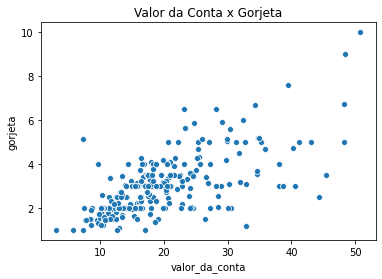

In [18]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
#Adicionar subtitulo
valor_gorjeta.set_title('Valor da Conta x Gorjeta')

**Visualmente o valor da gorjeta aumenta com o valor da conta**

In [19]:
print('A Base de dados contem {} registros'.format(gorjetas.shape[0]))

A Base de dados contem 244 registros


In [20]:
#Gorgetas não nulas
gorjetas.count()

valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

#Criando campo porcentagem

In [21]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [22]:
#Trabalahando com 2 casa decimais
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta).round(2)

In [23]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


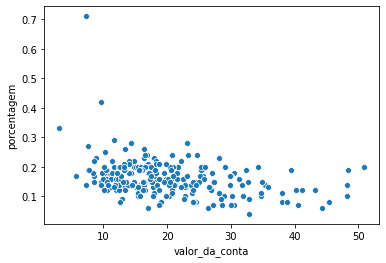

In [24]:
porcentagem_conta = sns.scatterplot(x=gorjetas.valor_da_conta, y=gorjetas.porcentagem, data=gorjetas)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

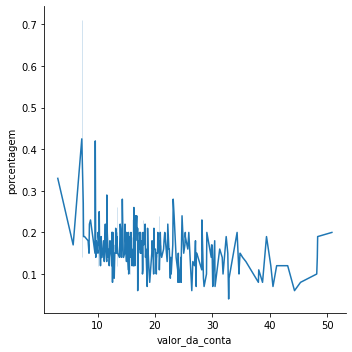

In [25]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

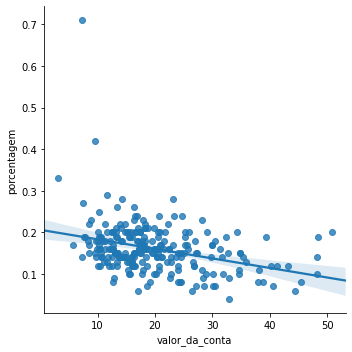

In [26]:
#Visualizar o tipo da regressão
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas) 


#Analise 2 - Sobremesa

In [27]:
#Descrição de quem pediu sobremesa
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [28]:
#Descrição de quem não pediu sobremesa
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


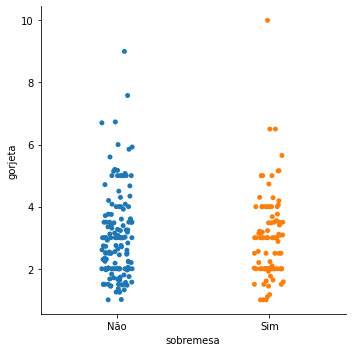

In [29]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

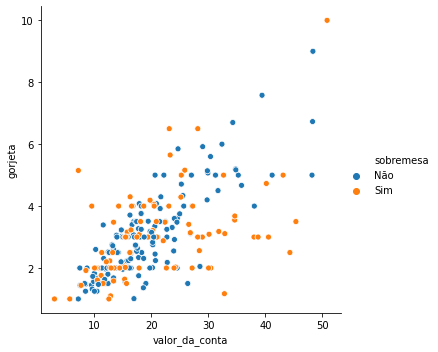

In [30]:
#Parametro Hue -> Llegenda
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

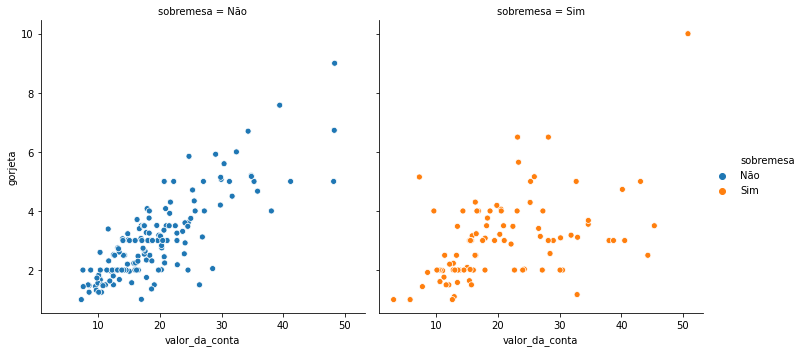

In [31]:
#Separar o gráfico por uma determinada coluna -> Parametro (COL)

sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

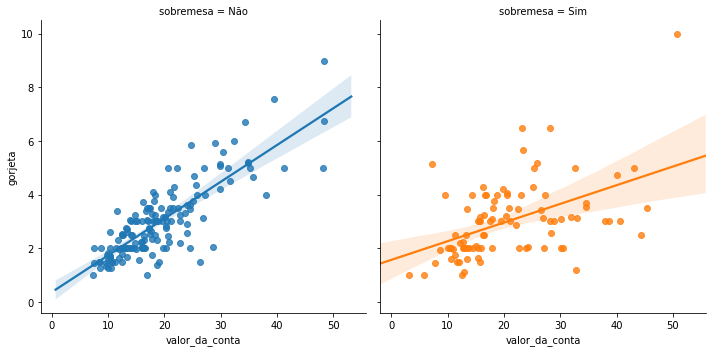

In [32]:
#Visualizar regressão de um gráfico -> Baseada na gorjeta
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

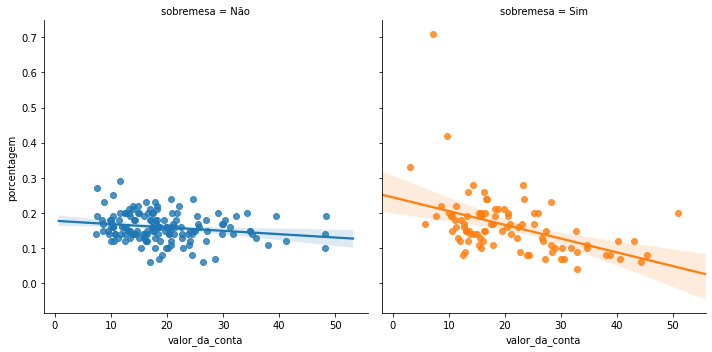

In [33]:
#Visualizar regressão de um gráfico - Baseada na porcentagem
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

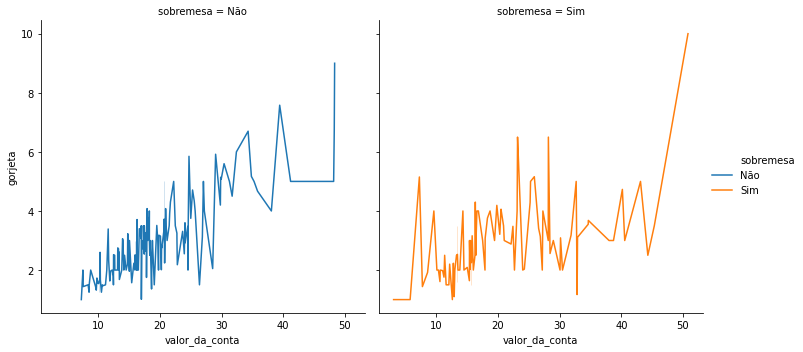

In [34]:

sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

**Visualmente existe diferença na gorjeta de quem perdiu ou não sobremesa**

## Teste de Hipotese

**H<sup>null</sup>**
**A distribuição da taxa é igual nos 2 grupos**

**H<sup>alt</sup>**
**A distribuição da taxa não é igual nos 2 grupos**

In [35]:
#Importar biblioteca estatistica
from scipy.stats import ranksums

In [36]:
#Porcentagem de quem deu gorjeta
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [37]:
#Porcentagem de quem não deu gorjeta
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [38]:
#pValue informa o valor da hipotese 0.52 (para o caso), diferença insignificante, o que torna a hipotese nula
r = ranksums(sobremesa, sem_sobremesa)

In [39]:
print('O valor do pvalue é {}'.format(r.pvalue))

O valor do pvalue é 0.5266635660124415


Hnull A distribuição da taxa é igual nos 2 grupos

#Analise 3 - Dia da Semana

In [40]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [41]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

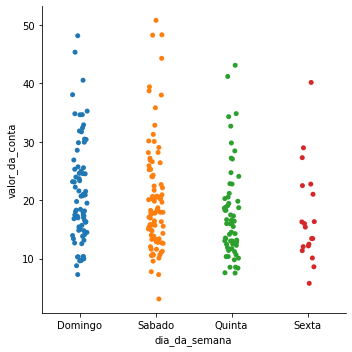

In [42]:
#Valor da conta por dia da Semana

sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

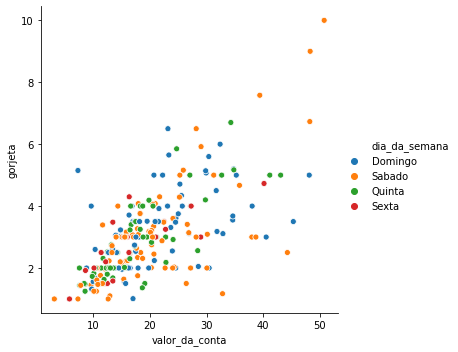

In [43]:
#Compartativo Gorjeta x Conta por Dia da Semama
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

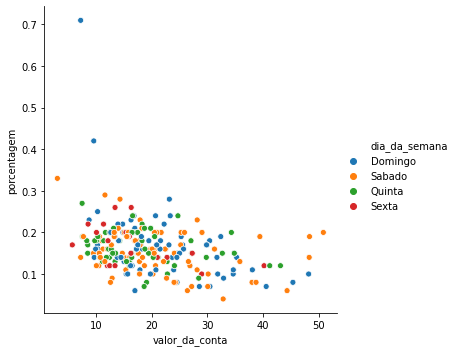

In [44]:
#Compartativo % Gorjeta x Conta por Dia da Semama
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

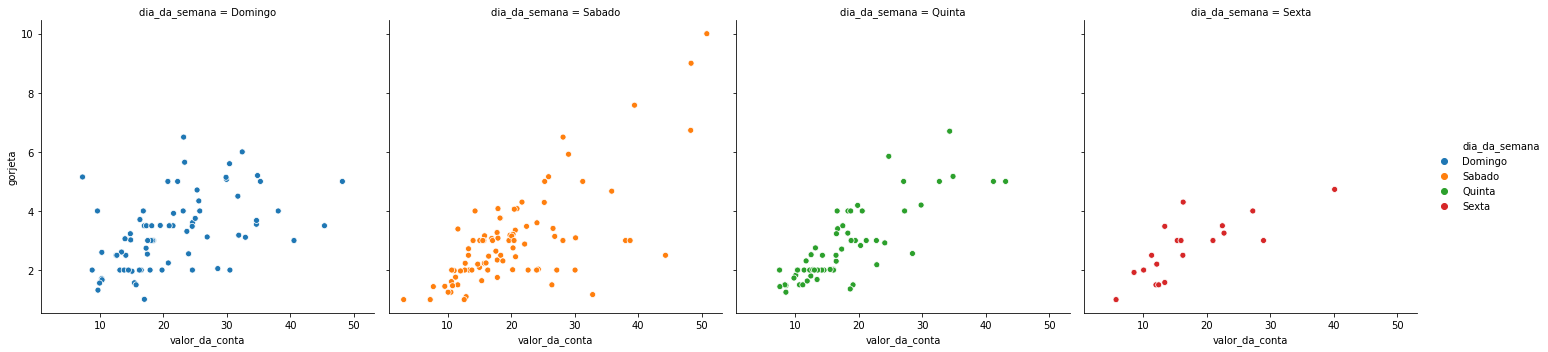

In [45]:
#Compartativo  Gorjeta x Conta por Dia da Semama
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

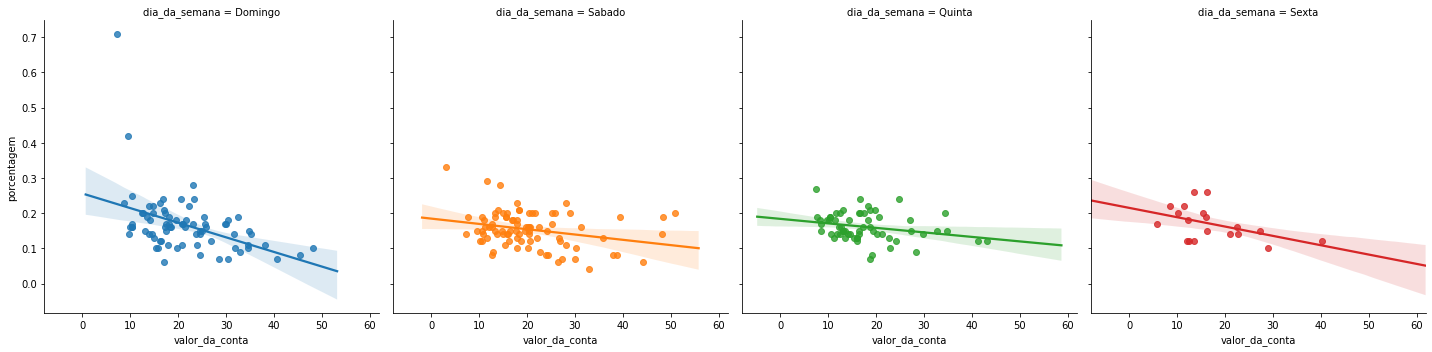

In [46]:
#Compartativo % Gorjeta x Conta por Dia da Semama (Com Regressão)
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [47]:
#Media das gorjetas
media_geral_gorjetas = gorjetas.gorjeta.mean()
print('Media geral das Gorjetas {}'.format(media_geral_gorjetas))

Media geral das Gorjetas 2.9982786885245902


In [48]:
# Media da Gorjeta por dia da semana - Apresentando as colunas selecionadas
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [49]:
#Frequencia nos dia da semana
gorjetas.dia_da_semana.value_counts()

Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

#Teste de Hipotese

**H<sup>null</sup>*
* **A distribuição dos valores é igual no sábado e no domingo**

**H<sup>alt</sup>*
* **A distribuição dos valores não é igual no sábado e no domingo**

In [50]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [51]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sabado'").valor_da_conta

In [52]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('Valor do pvelue é: {}'.format(r2.pvalue))

Valor do pvelue é: 0.3576728477868443


**H<sup>null</sup>*
* **A distribuição dos valores é igual no sábado e no domingo** (PValue < 0.5)


# Analise 4 - Hora do Dia

In [53]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

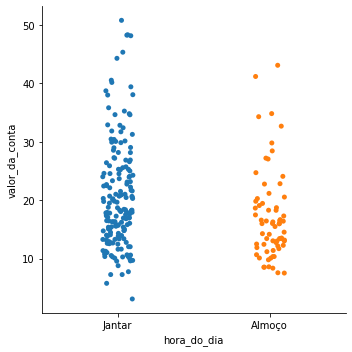

In [54]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',data=gorjetas)

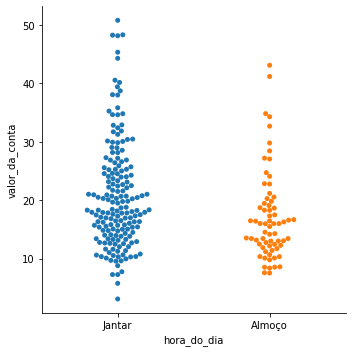

In [55]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

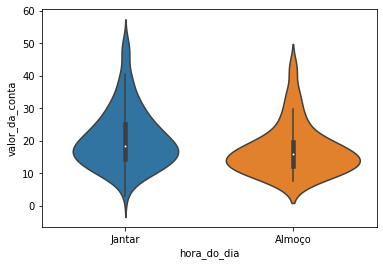

In [57]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

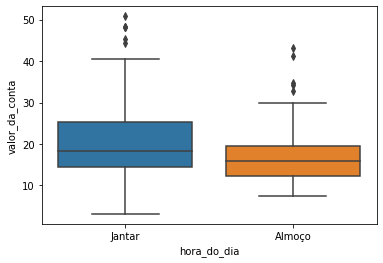

In [58]:
 sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [65]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

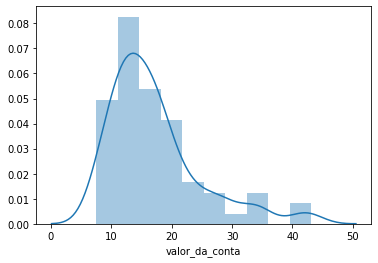

In [66]:
#Visualização em Histograma
sns.distplot(almoco)

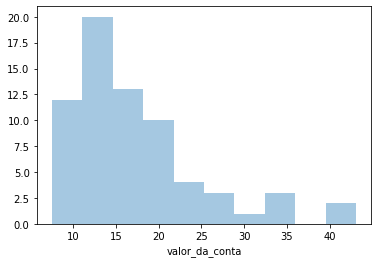

In [67]:
#Visualização em Histograma - Remover linha do histograma
sns.distplot(almoco, kde=False)

In [68]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

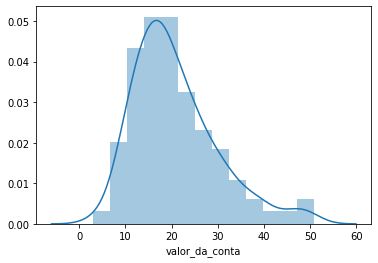

In [69]:
sns.distplot(jantar)

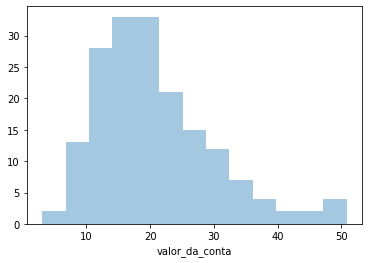

In [70]:
sns.distplot(jantar, kde=False)

In [72]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


# Teste de Hipotese

**H<sup>null</sup>*
* **A distribuição dos valores é igual no Jantar e no Almoço**

**H<sup>alt</sup>*
* **A distribuição dos valores não é igual no Jantar e no Almoço**

In [74]:
r2 = ranksums( jantar, almoco )
print('Se valor do pvalue menor que 0.05 hipotese alternativa: {}'.format(r2.pvalue))

Se valor do pvalue menor que 0.05 hipotese alternativa: 0.0011791039723641672



**H<sup>alt</sup>*
* **A distribuição dos valores não é igual no Jantar e no Almoço**

**H<sup>null</sup>*
* **A distribuição da porcentagem é igual no Jantar e no Almoço**

**H<sup>alt</sup>*
* **A distribuição da porcentagem não é igual no Jantar e no Almoço**

In [79]:
 #porcentagem = None
 porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
 porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [82]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)

print('Se valor do pvalue maior do que 0.05 hipotese null: {}'.format(r3.pvalue))

Se valor do pvalue maior do que 0.05 hipotese null: 0.2602493995587126


**H<sup>null</sup>*
* **A distribuição da porcentagem é igual no Jantar e no Almoço**